Project 1

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df  = pd.read_csv("Student_Score.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [16]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [22]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

Drop Unnamed column

In [23]:
df = df.drop("Unnamed: 0",axis = 1)

In [24]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


Change Weekly study hours Column

In [26]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","05 - 10")

In [28]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,05 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,05 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,05 - 10,76,78,75


Cheking Gender Distribution

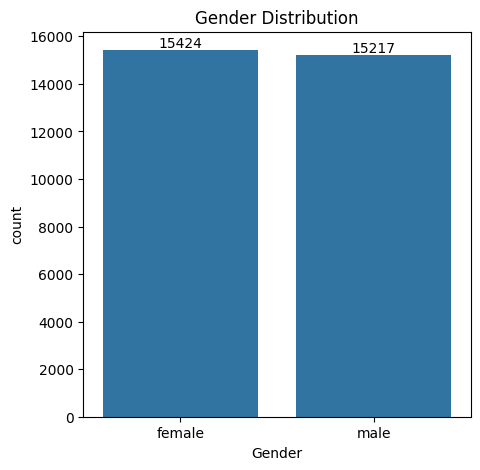

In [43]:
plt.figure(figsize=(5,5))
x = sns.countplot(data = df , x = "Gender")
x.bar_label(x.containers[0])
plt.title("Gender Distribution")
plt.show()

:==> From the above chart we have analysed that : 
The numebr of female in the data is more than the number of male.

Group By System

In [37]:
gb  = df.groupby("ParentEduc").agg({"MathScore":'mean' , "ReadingScore":'mean',"WritingScore":'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


<function matplotlib.pyplot.show(close=None, block=None)>

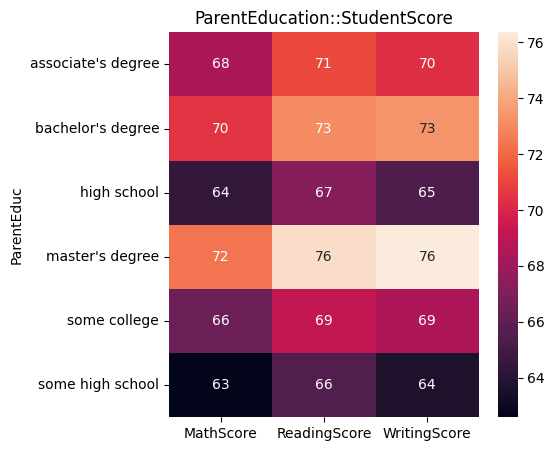

In [44]:
plt.figure(figsize=(5,5))
sns.heatmap(gb, annot = True)
plt.title("ParentEducation::StudentScore")
plt.show

:==>  From the above chart: That the education of the parednts have a good impact on the child's education.  The child's education is better when the parents have a higher

In [41]:
gb1  = df.groupby("ParentMaritalStatus").agg({"MathScore":'mean' , "ReadingScore":'mean',"WritingScore":'mean'})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


<function matplotlib.pyplot.show(close=None, block=None)>

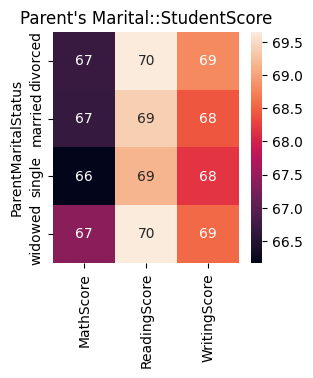

In [45]:
plt.figure(figsize=(3,3))
sns.heatmap(gb1, annot = True)
plt.title("Parent's Marital::StudentScore")
plt.show

:==> From the above the chart their is no/negligible  impact  on the student result due to their marital status.

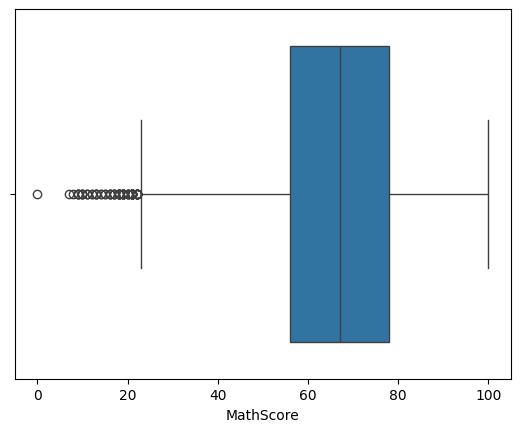

In [51]:
sns.boxplot(data = df , x = "MathScore")
plt.show()

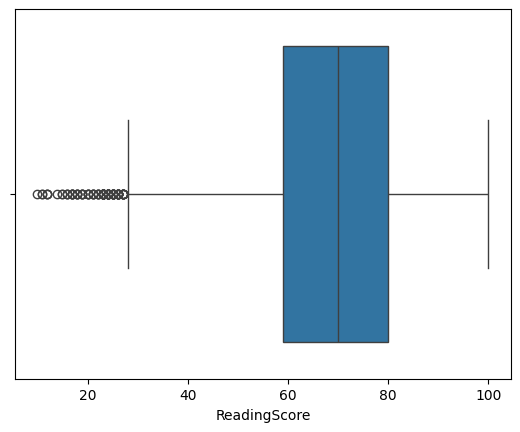

In [52]:
sns.boxplot(data = df , x = "ReadingScore")
plt.show()

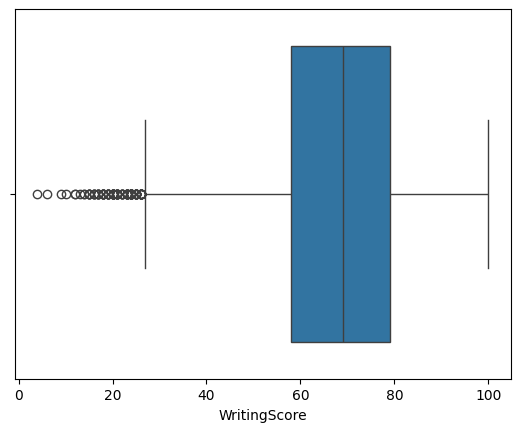

In [53]:
sns.boxplot(data = df , x = "WritingScore")
plt.show()

In [54]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


Distribution of Ethnic group

In [59]:
grA = df.loc[(df['EthnicGroup'] == "group A")].count()
print(grA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


In [67]:
grB = df.loc[(df['EthnicGroup'] == "group B")].count()
print(grB)

Gender                 5826
EthnicGroup            5826
ParentEduc             5470
LunchType              5826
TestPrep               5488
ParentMaritalStatus    5605
PracticeSport          5704
IsFirstChild           5649
NrSiblings             5546
TransportMeans         5238
WklyStudyHours         5642
MathScore              5826
ReadingScore           5826
WritingScore           5826
dtype: int64


In [66]:
grC = df.loc[(df['EthnicGroup'] == "group C")].count()
print(grC)

Gender                 9212
EthnicGroup            9212
ParentEduc             8652
LunchType              9212
TestPrep               8652
ParentMaritalStatus    8858
PracticeSport          9050
IsFirstChild           8929
NrSiblings             8763
TransportMeans         8280
WklyStudyHours         8933
MathScore              9212
ReadingScore           9212
WritingScore           9212
dtype: int64


In [62]:
grD = df.loc[(df['EthnicGroup'] == "group D")].count()
print(grD)


Gender                 7503
EthnicGroup            7503
ParentEduc             7056
LunchType              7503
TestPrep               7070
ParentMaritalStatus    7218
PracticeSport          7343
IsFirstChild           7285
NrSiblings             7106
TransportMeans         6713
WklyStudyHours         7270
MathScore              7503
ReadingScore           7503
WritingScore           7503
dtype: int64


In [63]:
grE = df.loc[(df['EthnicGroup'] == "group E")].count()
print(grE)

Gender                 4041
EthnicGroup            4041
ParentEduc             3814
LunchType              4041
TestPrep               3804
ParentMaritalStatus    3892
PracticeSport          3954
IsFirstChild           3918
NrSiblings             3820
TransportMeans         3624
WklyStudyHours         3924
MathScore              4041
ReadingScore           4041
WritingScore           4041
dtype: int64


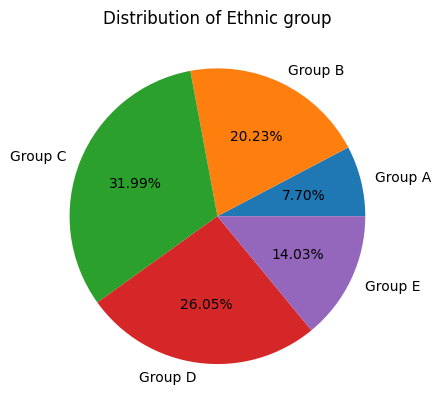

In [72]:
l = ["Group A","Group B","Group C","Group D","Group E",]
myList = [grA["EthnicGroup"],grB["EthnicGroup"],grC["EthnicGroup"],grD["EthnicGroup"],grE["EthnicGroup"]]
plt.pie(myList , labels=l , autopct="%1.2f%%")
plt.title("Distribution of Ethnic group")
plt.show()

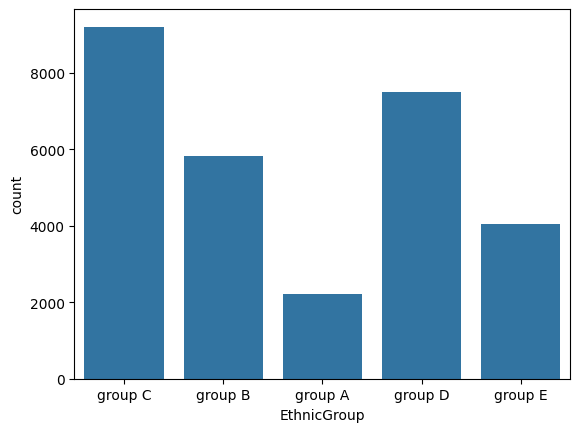

In [74]:
sns.countplot(data=df,x =  "EthnicGroup")
x.bar_label(x.containers[0])
plt.show()